<IPython.core.display.Javascript object>


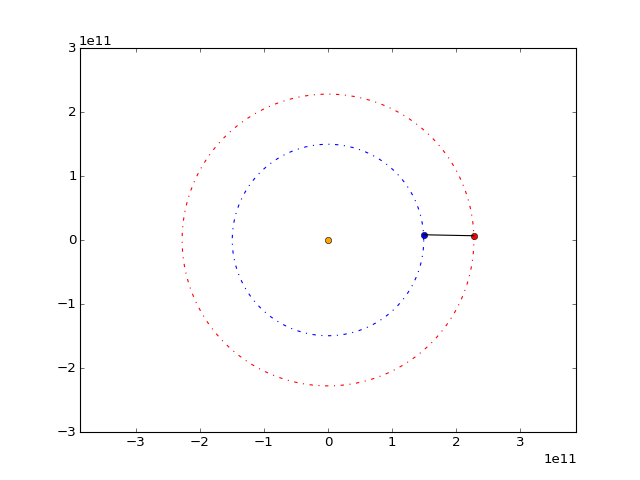

KeyboardInterrupt: 

In [4]:
#Animation Terre-Mars
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division 
from scipy import *                  
from pylab import * 
import os

UA=149597870700
jour=3600*24
annee=365*3600*24
k=2*np.pi

Rterre=1*UA
Rmars=1.52366231*UA
Rsoleil=696342000

Tterre=1*annee
Tmars=1.8808*annee
Tsoleil=27.28*jour

#angle continu
def theta(T):
    return k*np.linspace(0, T, 1000)/T

#Orbites des planètes
#Terre
xt=Rterre*np.cos(theta(Tterre))
yt=Rterre*np.sin(theta(Tterre))
#Mars
xma=Rmars*np.cos(theta(Tmars))
yma=Rmars*np.sin(theta(Tmars))


#initialisation 
tini = 0 
tfin = 2*annee 
Npas = 2*365

#angle discret
def alpha(t,T):
    return k*t/T

#Positions Successives 
def Positionsterre(t): 
    x = Rterre*np.cos(alpha(t,Tterre))
    y = Rterre*np.sin(alpha(t,Tterre))
    return [x, y]

def Positionsmars(t):
    x = Rmars*np.cos(alpha(t,Tmars))
    y = Rmars*np.sin(alpha(t,Tmars))
    return [x, y]
 
# Construction d'une série d'images et de leur assemblage dans une animation 
for k in range(Npas): 
    t = tini + 20*jour
    #Orbite de la Terre
    plt.plot(xt,yt,color='blue',linewidth=1,linestyle='-.')
    #Orbite de Mars
    plt.plot(xma,yma,color='red',linewidth=1,linestyle='-.')
    #Soleil
    plt.plot(0,0,'o',color='orange')
    #Positions de la Terre
    plt.plot(Positionsterre(t)[0], Positionsterre(t)[1], 'o', color='blue')
    #Positions de Mars
    plt.plot(Positionsmars(t)[0], Positionsmars(t)[1], 'o', color='red')
    #droite Terre-Mars
    plt.plot([Positionsterre(t)[0], Positionsmars(t)[0]], [Positionsterre(t)[1], Positionsmars(t)[1]], 
             color='black',linewidth=1,linestyle='-')
    plt.axis('equal') 
    savefig('fichierTemp'+str('%02d' %k)+'.pdf') 
    clf() 



<IPython.core.display.Javascript object>


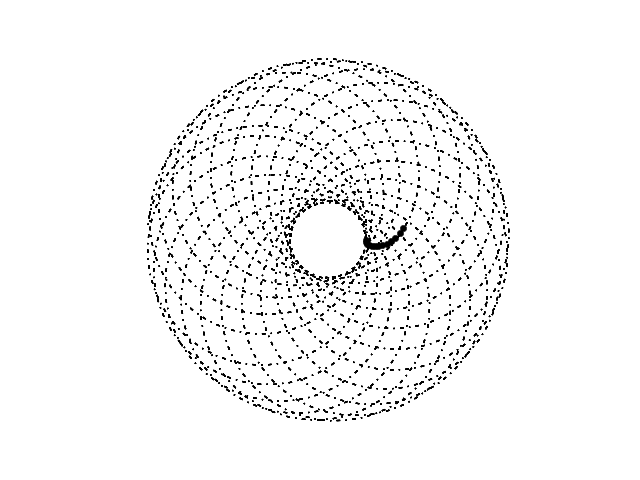

KeyboardInterrupt: 

In [5]:
from __future__ import division 
from scipy import *                  
from pylab import * 
import os
%matplotlib notebook

def parallaxemars(t):
    return [m-t for t,m in zip(Positionsterre(t),Positionsmars(t))]

for k in range(Npas): 
    t = tini + 50*jour 
    plt.plot(xm-xt,ym-yt,color='black',linewidth=1,linestyle='-.')
    plt.plot(parallaxemars(t)[0], parallaxemars(t)[1], 'o', color='black')
    plt.axis('equal') 
    filename = 'fichierTemp'+str('%02d' %k)+'.pdf' 
    savefig(filename) 
     

<IPython.core.display.Javascript object>


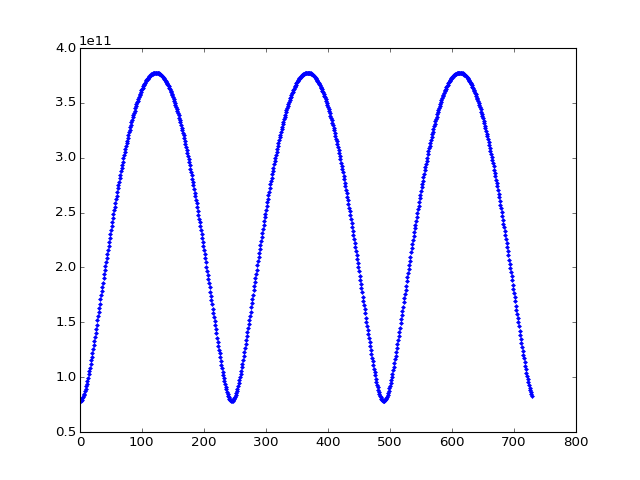

In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division 
from scipy import *                  
from pylab import * 
import os
for k in range(Npas): 
    t = tini + 20*jour
    #Distance Terre-Mars
    Dcarre=(Positionsterre(t)[0]-Positionsmars(t)[0])**2+(Positionsterre(t)[1]-Positionsmars(t)[1])**2
    plt.plot(k,math.sqrt(Dcarre), '.', color='blue')
    

<IPython.core.display.Javascript object>


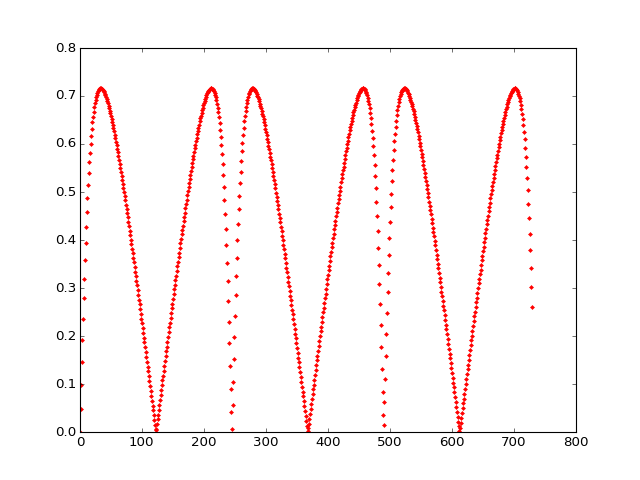

In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division 
from scipy import *                  
from pylab import * 
import os
for k in range(Npas): 
    t = tini + 20*jour
    Dcarre=(Positionsterre(t)[0]-Positionsmars(t)[0])**2+(Positionsterre(t)[1]-Positionsmars(t)[1])**2
    #Angle Terre-Mars-Soleil
    angle=np.arccos((Rmars**2+Dcarre-Rterre**2)/(2*math.sqrt(Dcarre)*Rmars))
    plt.plot(k,angle,'.',color='red')